In [ ]:
# First, mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  Q1 & Q2

In [ ]:
# Change to Solution directory where our implementation files are located
%cd /content/drive/MyDrive/CV_Assignment4/Solution

# Add parent directory to Python path to find other modules
# Assignment4_datasets and other files are in parent directory
import sys
sys.path.append('..')  # Add parent directory
sys.path.append('.')   # Add current directory for Solution files

/content/drive/MyDrive/CV_Assignment4/Solution


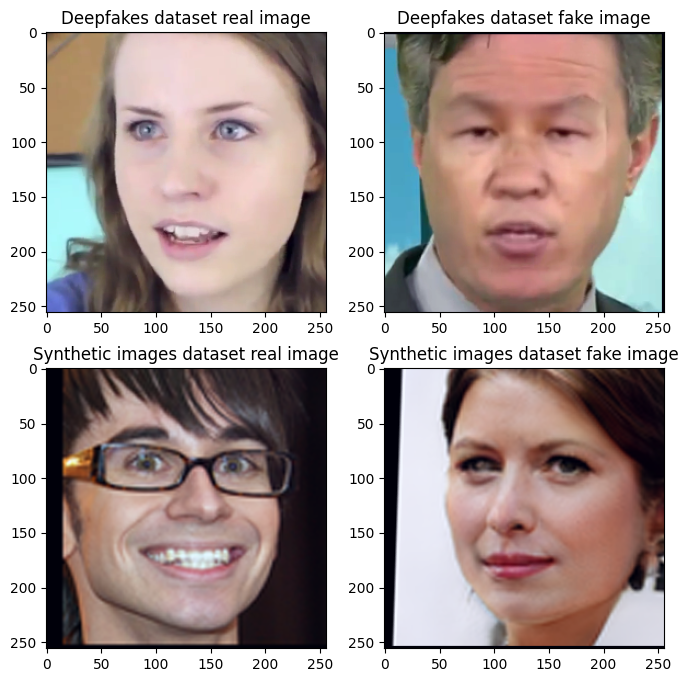

In [ ]:
# Run the visualization script
import plot_samples_of_faces_datasets
plot_samples_of_faces_datasets.main()

Figure 1 shows sample images from both datasets used in this project. The top row displays examples from the Deepfakes dataset, with a real image (left) and a fake image (right). The bottom row shows examples from the Synthetic dataset, also presenting a real image (left) and a synthetic image (right). All images are displayed at a resolution of 256x256 pixels, demonstrating successful implementation of the FacesDataset class with proper image loading and transformation capabilities.

Q3, Q4 & Q5

In [ ]:
# Move to the Solution directory
%cd /content/drive/MyDrive/CV_Assignment4/Solution

# Run training script with specified parameters
!python train_main.py -d fakes_dataset -m SimpleNet --lr 0.001 -b 32 -e 5 -o Adam

/content/drive/MyDrive/CV_Assignment4/Solution
==> Preparing data: fakes dataset..
Building model SimpleNet...
Building optimizer Adam...
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1/5
Epoch [001] | Loss: 0.022 | Acc: 34.38[%] (11/32)
Epoch [001] | Loss: 0.022 | Acc: 64.43[%] (701/1088)
Epoch [001] | Loss: 0.020 | Acc: 65.58[%] (1406/2144)
Epoch [001] | Loss: 0.020 | Acc: 66.75[%] (2136/3200)
Epoch [001] | Loss: 0.019 | Acc: 68.68[%] (2923/4256)
Epoch [001] | Loss: 0.018 | Acc: 70.75[%] (3758/5312)
Epoch [001] | Loss: 0.018 | Acc: 71.72[%] (4567/6368)
Epoch [001] | Loss: 0.017 | Acc: 73.01[%] (5420/7424)
Epoch [001] | Loss: 0.016 | Acc: 74.08[%] (6282/8480)
Epoch [001] | Loss: 0.016 | Acc: 75.17[%] (7168/9536)
Epoch [001] | Loss: 0.016 | Acc: 75.75[%] (8023/10592)
Epoch [001] | Loss: 0.016 | Acc: 75.82[%]

Q6

The JSON file contains data from two training runs of the SimpleNet model on the fakes_dataset, providing a comprehensive record of the training process. Each run is documented with detailed configuration parameters, including the Adam optimizer settings (learning rate of 0.001, beta values [0.9, 0.999], and other hyperparameters).
The training metrics show consistent patterns across both runs: the training loss demonstrates a steady decrease from approximately 0.015 to 0.003 over five epochs, while training accuracy improves significantly from around 75% to 95%. However, there's a notable gap between training and validation/test performance. While training accuracy reaches approximately 95%, both validation and test accuracies plateau around 87-89%, suggesting some degree of overfitting. This behavior is consistent across both training runs, indicating it's a characteristic of the model rather than a random occurrence.
The validation and test metrics exhibit similar patterns and values, which indicates that the model's generalization performance is being measured consistently. The systematic documentation of all parameters and metrics makes these experiments fully reproducible and provides a solid foundation for comparison with other model architectures or training approaches.


Q7 & Q8

The training metrics show a clear pattern of overfitting: while the training loss continuously decreases and training accuracy rises to approximately 95%, both validation and test metrics show unstable behavior. Although validation and test metrics follow similar patterns to each other, they plateau around 87-88% accuracy with noticeable fluctuations, significantly lower than the training performance. This growing gap between training and validation/test performance suggests that the model is memorizing the training data rather than learning generalizable features. The documentation of these metrics provides clear evidence of the model's limitations in generalizing to unseen data.

In [ ]:
!python plot_accuracy_and_loss.py -m SimpleNet -j out/fakes_dataset_SimpleNet_Adam.json -d fakes_dataset

Loss Plot:


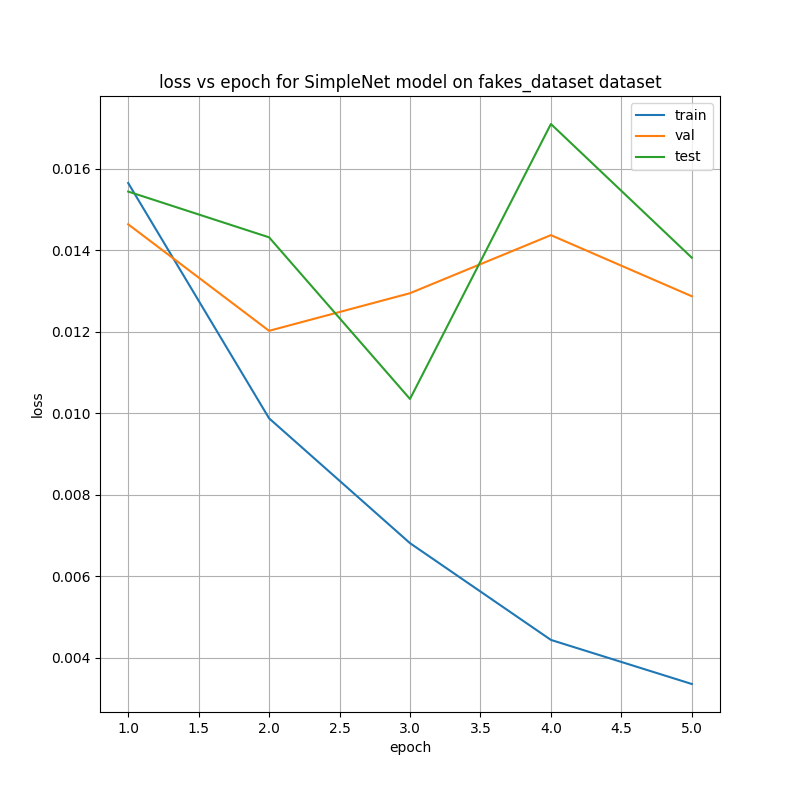


Accuracy Plot:


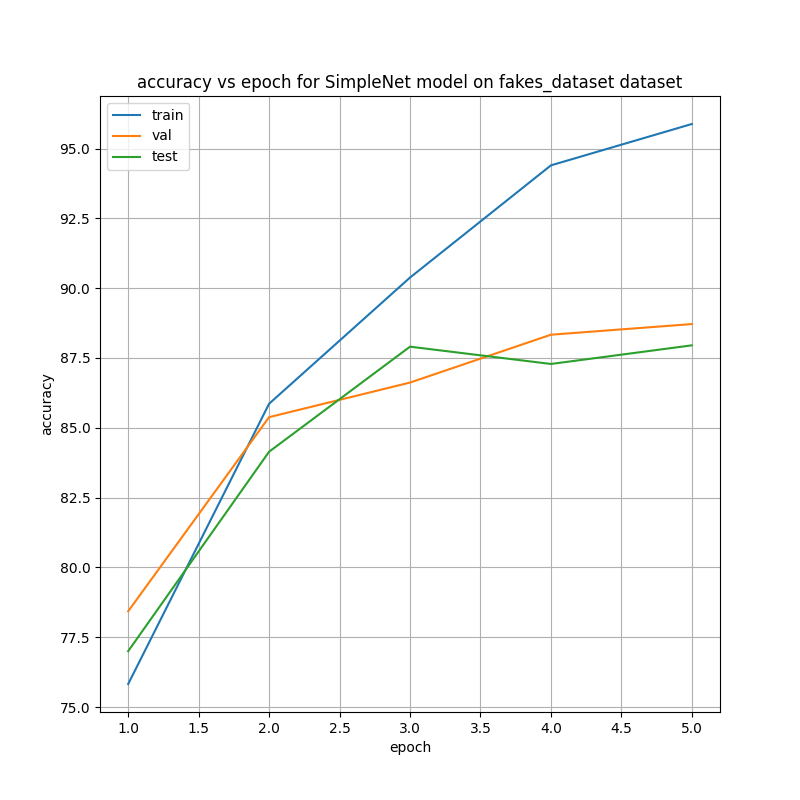

In [ ]:
from IPython.display import Image, display

print("Loss Plot:")
display(Image('figures/fakes_dataset_SimpleNet_losses_plot.png'))

print("\nAccuracy Plot:")
display(Image('figures/fakes_dataset_SimpleNet_accuracies_plot.png'))

Q9

The set is composed of 700 fake images and 1400 real images. This creates a clear 1:2 ratio between fake and real images in the test set, meaning for every fake image there are two real images. This proportion can also be expressed as 0.5 or 33.33% fake images to 66.67% real images. This imbalanced distribution is important to consider when evaluating the model's performance, as it indicates that the test set contains twice as many real images as fake ones.

Q10 & Q11

The ROC curves show that the first score (A), representing the "real" class confidence, demonstrates very poor performance with an AuC of 0.058, while the second score (B), representing the "fake" class confidence, achieves excellent performance with an AuC of 0.942. This pattern is similarly reflected in the DET curves, where score A exhibits consistently high error rates while score B shows substantially lower error rates across different operating points.
This significant difference in performance can be explained by our labeling convention: since we defined label 1 as the positive class (fake images), the second network output directly aligns with our classification goal, while the first output effectively measures the opposite prediction. Thus, what appears as poor performance for score A is actually the expected behavior given our labeling scheme, as it's inversely related to our target classification. The complementary nature of these scores demonstrates that the model is learning the correct patterns, just expressing them through opposite confidence measures.

In [ ]:
!python numerical_analysis.py -m SimpleNet -cpp checkpoints/fakes_dataset_SimpleNet_Adam.pt -d fakes_dataset

Building model SimpleNet...
/content/drive/MyDrive/CV_Assignment4/Solution/numerical_analysis.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(tor

ROC Curve:


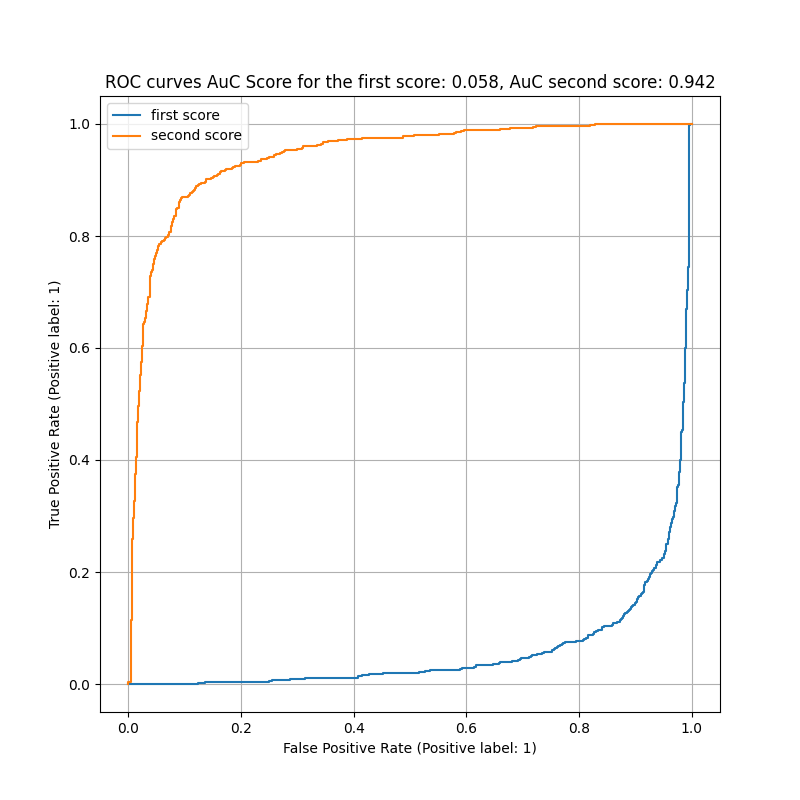


DET Curve:


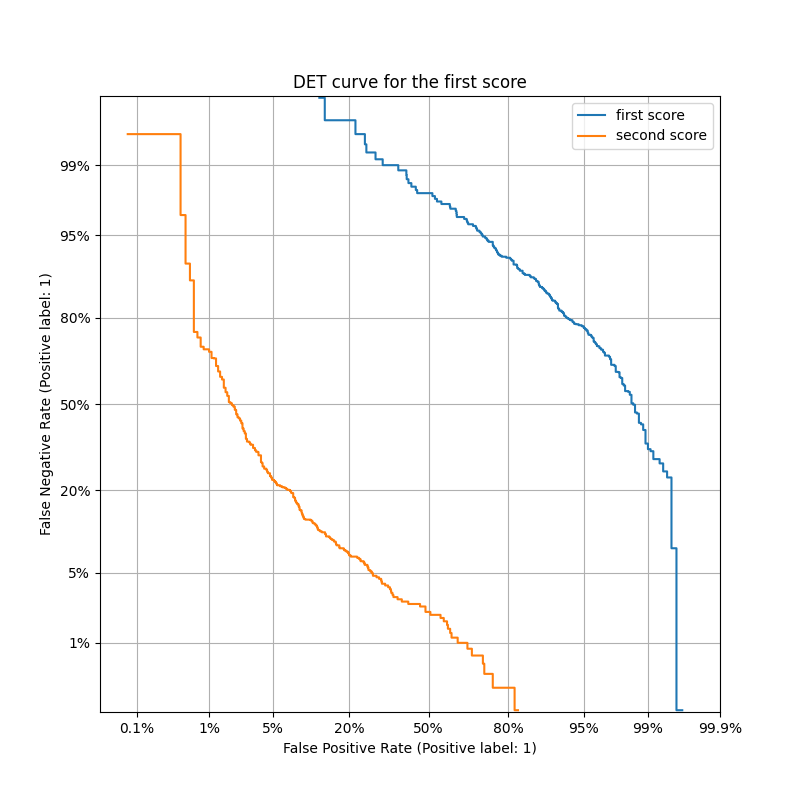

In [ ]:
# Import required libraries
from IPython.display import Image
import os

# Check and display ROC curve
roc_path = 'figures/fakes_dataset_SimpleNet_roc_curve.png'
if os.path.exists(roc_path):
    print("ROC Curve:")
    display(Image(roc_path))
else:
    print(f"ROC curve not found at {roc_path}")

# Check and display DET curve
det_path = 'figures/fakes_dataset_SimpleNet_det_curve.png'
if os.path.exists(det_path):
    print("\nDET Curve:")
    display(Image(det_path))
else:
    print(f"DET curve not found at {det_path}")

Q12

In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

!python train_main.py -d synthetic_dataset -m SimpleNet --lr 0.001 -b 32 -e 5 -o Adam

/content/drive/MyDrive/CV_Assignment4/Solution
==> Preparing data: synthetic dataset..
Building model SimpleNet...
Building optimizer Adam...
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1/5
Epoch [001] | Loss: 0.022 | Acc: 40.62[%] (13/32)
Epoch [001] | Loss: 0.023 | Acc: 50.10[%] (481/960)
Epoch [001] | Loss: 0.022 | Acc: 50.21[%] (948/1888)
Epoch [001] | Loss: 0.022 | Acc: 50.85[%] (1432/2816)
Epoch [001] | Loss: 0.022 | Acc: 49.97[%] (1871/3744)
Epoch [001] | Loss: 0.022 | Acc: 50.41[%] (2355/4672)
Epoch [001] | Loss: 0.022 | Acc: 50.36[%] (2820/5600)
Epoch [001] | Loss: 0.022 | Acc: 49.97[%] (3262/6528)
Epoch [001] | Loss: 0.022 | Acc: 49.80[%] (3713/7456)
Epoch [001] | Loss: 0.022 | Acc: 49.87[%] (4181/8384)
Epoch [001] | Loss: 0.022 | Acc: 49.76[%] (4634/9312)
Epoch [001] | Loss: 0.022 | Acc: 49.68[%

Q13

In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution
!python plot_accuracy_and_loss.py -m SimpleNet -j out/synthetic_dataset_SimpleNet_Adam.json -d synthetic_dataset

/content/drive/MyDrive/CV_Assignment4/Solution


Loss Plot:


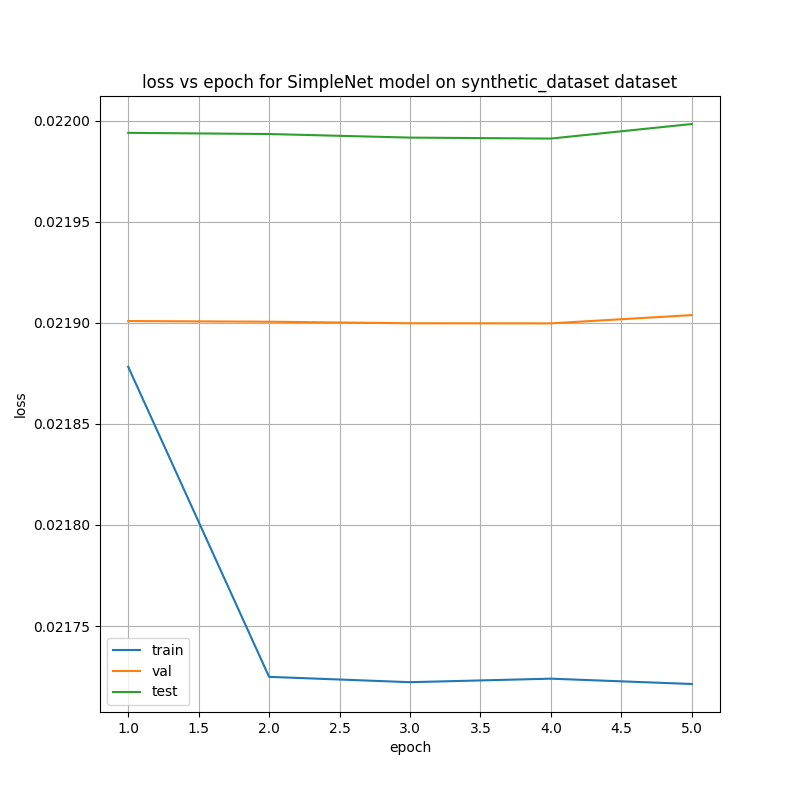


Accuracy Plot:


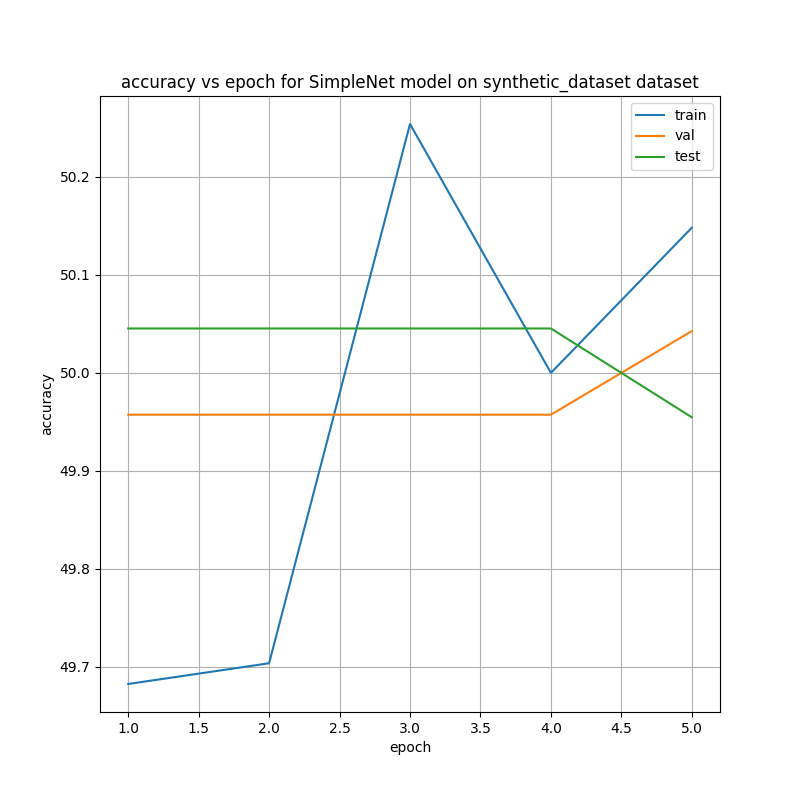

In [ ]:
from IPython.display import Image
import os

# Check and display Loss plot
loss_path = 'figures/synthetic_dataset_SimpleNet_losses_plot.png'
if os.path.exists(loss_path):
    print("Loss Plot:")
    display(Image(loss_path))
else:
    print(f"Loss plot not found at {loss_path}")

# Check and display Accuracy plot
acc_path = 'figures/synthetic_dataset_SimpleNet_accuracies_plot.png'
if os.path.exists(acc_path):
    print("\nAccuracy Plot:")
    display(Image(acc_path))
else:
    print(f"Accuracy plot not found at {acc_path}")

Q14

The validation accuracy peaks at around 50.4% during epoch 5, with a corresponding test accuracy of approximately 49.7%. These results, hovering around 50%, clearly indicate that the model is performing at the level of random guessing. This is further supported by the loss graph, which shows minimal change across all datasets (training, validation, and test), with values consistently around 0.022. This stands in contrast to our previous results on the fakes dataset, where the model achieved meaningful learning with test accuracies well above 80%.
This significant performance gap between the two datasets suggests either that the SimpleNet architecture lacks the sophistication needed to capture synthetic image patterns, or that synthetic image detection is inherently more challenging than deepfake detection.


Q15

The test set contains a total of 1,103 images, with 552 synthetic images and 551 real images. This creates an almost perfectly balanced ratio of approximately 1:1 between synthetic and real images (more precisely, 1.002:1). This balanced distribution suggests that the model's poor performance (around 50% accuracy) cannot be attributed to class imbalance, but rather points to the model's inability to effectively distinguish between real and synthetic images

Q16

Looking at all performance metrics from our synthetic dataset experiment, we can conclude that we obtained a failed classifier that performs no better than random guessing. The evidence is clear across multiple indicators: the training accuracy oscillates around 50%, validation accuracy remains constant at approximately 50%, test accuracy hovers around 50%, and perhaps most tellingly, the loss values show minimal change throughout the entire training process.
The model's behavior demonstrates characteristics of a constant classifier that makes essentially random predictions, showing no meaningful learning or pattern recognition capabilities. Despite training for multiple epochs and having access to a balanced dataset, it fails to develop any discriminative ability between real and synthetic images. With performance metrics consistently at 50% across all datasets, the classifier is performing exactly at the level of random chance, indicating a complete failure to learn the intended classification task. This represents the worst possible outcome for a binary classifier, as it suggests the model has failed to identify any meaningful patterns that distinguish between the two classes.

  Q17

Looking at the samples from both datasets, these results make sense. Deepfake images are created by face-swapping, which often produces visible artifacts at face boundaries that are easier to detect. In contrast, synthetic images are generated by a sophisticated GAN (PGAN) trained on high-quality images, making them much more realistic and harder for a simple model to distinguish from real photos.


#chapter 4


Q18

The Xception model used in this exercise is pre-trained on ImageNet, a large-scale image classification dataset. This pre-training provides the model with strong feature extraction capabilities learned from over a million images across 1000 different categories, which we can leverage for our facial manipulation detection task by replacing only the classification head.

Q19
Looking at the code structure, the basic building blocks of Xception are:

Initial convolution layers
12 repeated blocks (block1 through block12)
Final convolution layers
Batch normalization after convolutions
ReLU activation functions
Average pooling
A fully connected layer at the end

Q20
same as Q18?

Q21
Looking at the code, before the 'fc' (fully connected) layer, we can see:

There's adaptive average pooling to (1,1)
The tensor is reshaped (view operation)
Then it goes into the fc layer

This shows that the input dimension to 'fc' is 2048.

Q22

Looking at both sources:

From running get_nof_params: 22,855,952 parameters
From the paper (Table 3): 22,855,952 parameters

Both sources show that Xception has exactly 22,855,952 parameters by default, without any architectural changes.

In [ ]:
import sys
sys.path.append('.')

from utils import get_nof_params
import torch
from xcpetion import build_xception_backbone

model = build_xception_backbone()
num_params = get_nof_params(model)
print(f"Number of parameters: {num_params}")

Number of parameters: 22855952


Q23 & Q24

In [ ]:
# Make sure we're in the right directory
%cd /content/drive/MyDrive/CV_Assignment4/Solution

import sys
sys.path.append('.')

from utils import get_nof_params
import torch
from xcpetion import build_xception_backbone

# Get base model parameters
base_model = build_xception_backbone()
base_params = get_nof_params(base_model)
print(f"Base Xception parameters: {base_params}")

/content/drive/MyDrive/CV_Assignment4/Solution
Base Xception parameters: 22855952


In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

# Add all necessary imports
import torch
from torch import nn
import sys
sys.path.append('.')

from utils import get_nof_params
from xcpetion import build_xception_backbone

# First check base model
base_model = build_xception_backbone()
base_params = get_nof_params(base_model)
print(f"Base Xception parameters: {base_params}")

# Then check our modified model
from models import get_xception_based_model
model = get_xception_based_model()
modified_params = get_nof_params(model)
print(f"\nModified Xception parameters: {modified_params}")
print(f"\nParameters added: {modified_params - base_params}")

/content/drive/MyDrive/CV_Assignment4/Solution
Base Xception parameters: 22855952

Modified Xception parameters: 23128786

Parameters added: 272834


According to our output:

Original Xception parameters: 22,855,952
Modified Xception parameters: 23,128,786
Parameters added: 272,834

Answer: We added 272,834 parameters with the MLP on top of the original Xception's parameters count.

Q25

In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

!python train_main.py -d synthetic_dataset -m XceptionBased --lr 0.001 -b 32 -e 2 -o Adam

/content/drive/MyDrive/CV_Assignment4/Solution
==> Preparing data: synthetic dataset..
Building model XceptionBased...
Building optimizer Adam...
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1/2
Epoch [001] | Loss: 0.022 | Acc: 40.62[%] (13/32)
Epoch [001] | Loss: 0.022 | Acc: 47.71[%] (458/960)
Epoch [001] | Loss: 0.022 | Acc: 48.46[%] (915/1888)
Epoch [001] | Loss: 0.022 | Acc: 49.25[%] (1387/2816)
Epoch [001] | Loss: 0.022 | Acc: 50.27[%] (1882/3744)
Epoch [001] | Loss: 0.022 | Acc: 50.58[%] (2363/4672)
Epoch [001] | Loss: 0.022 | Acc: 51.20[%] (2867/5600)
Epoch [001] | Loss: 0.022 | Acc: 51.07[%] (3334/6528)
Epoch [001] | Loss: 0.022 | Acc: 50.71[%] (3781/7456)
Epoch [001] | Loss: 0.022 | Acc: 50.78[%] (4257/8384)
Epoch [001] | Loss: 0.022 | Acc: 50.87[%] (4737/9312)
Epoch [001] | Loss: 0.022 | Acc: 50.

  Q26

In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

!python plot_accuracy_and_loss.py -m XceptionBased -j out/synthetic_dataset_XceptionBased_Adam.json -d synthetic_dataset

/content/drive/MyDrive/CV_Assignment4/Solution


Loss Plot:


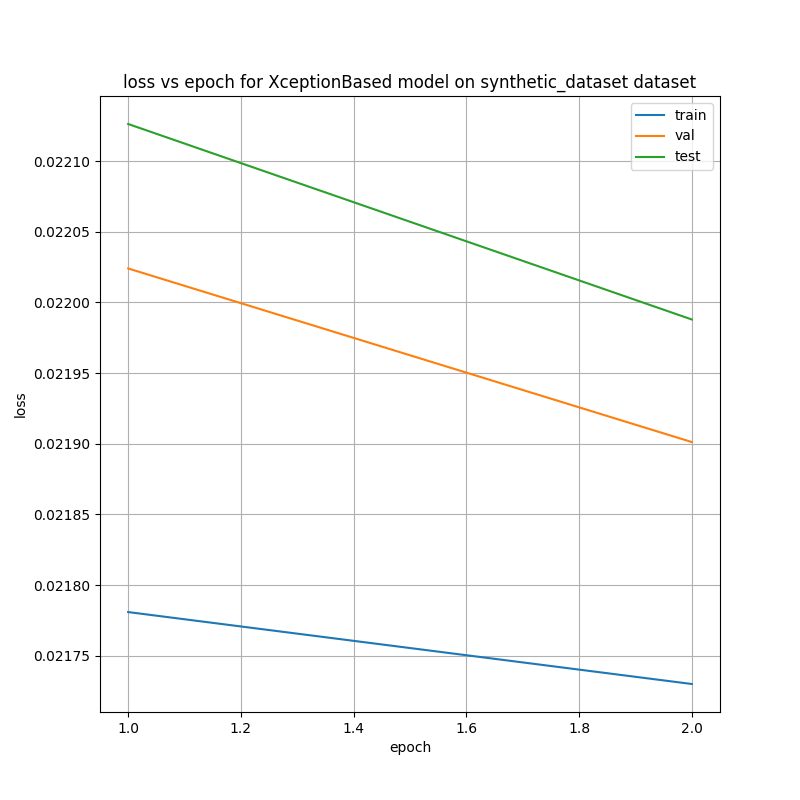


Accuracy Plot:


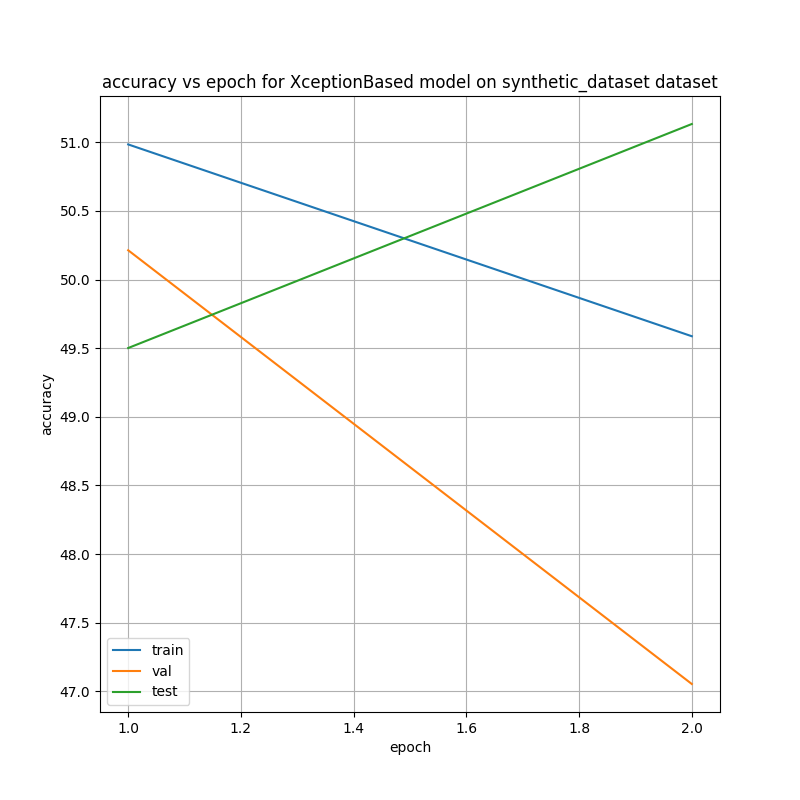

In [ ]:
from IPython.display import Image

# Display Loss plot
print("Loss Plot:")
display(Image('figures/synthetic_dataset_XceptionBased_losses_plot.png'))

# Display Accuracy plot
print("\nAccuracy Plot:")
display(Image('figures/synthetic_dataset_XceptionBased_accuracies_plot.png'))

Q27
Looking at the accuracy plot:

Validation accuracy (orange line) starts at about 50.2% at epoch 1, which is its highest point
At that point, the corresponding test accuracy (green line) is approximately 49.5%

Therefore, the test accuracy corresponding to the highest validation accuracy (which occurs at epoch 1) is around 49.5%.

Q28


In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

!python numerical_analysis.py -m XceptionBased -cpp checkpoints/synthetic_dataset_XceptionBased_Adam.pt -d synthetic_dataset

/content/drive/MyDrive/CV_Assignment4/Solution
Building model XceptionBased...
/content/drive/MyDrive/CV_Assignment4/Solution/numerical_analysis.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

ROC Curve:


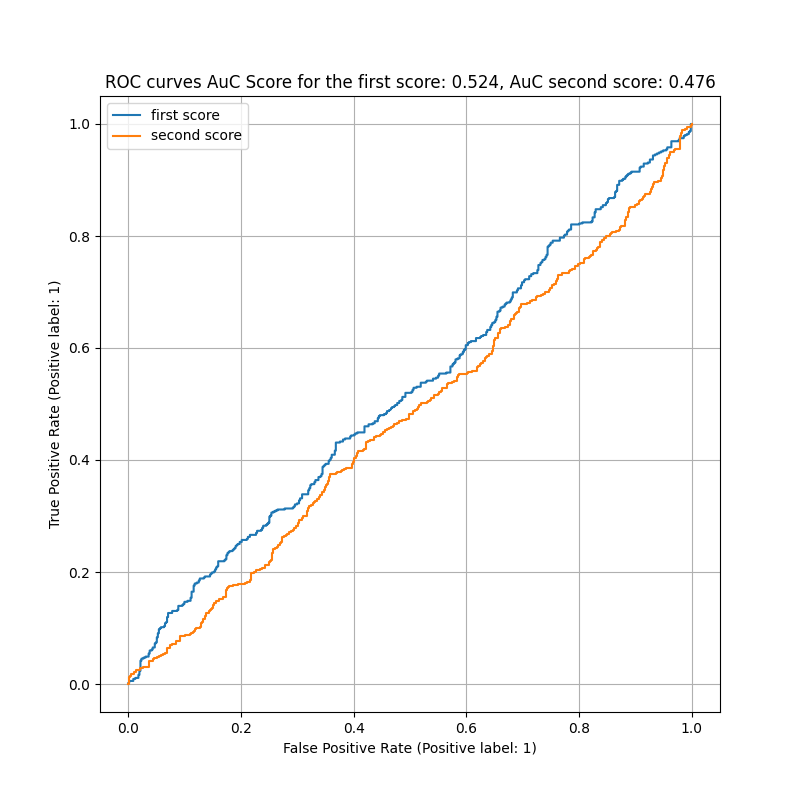


DET Curve:


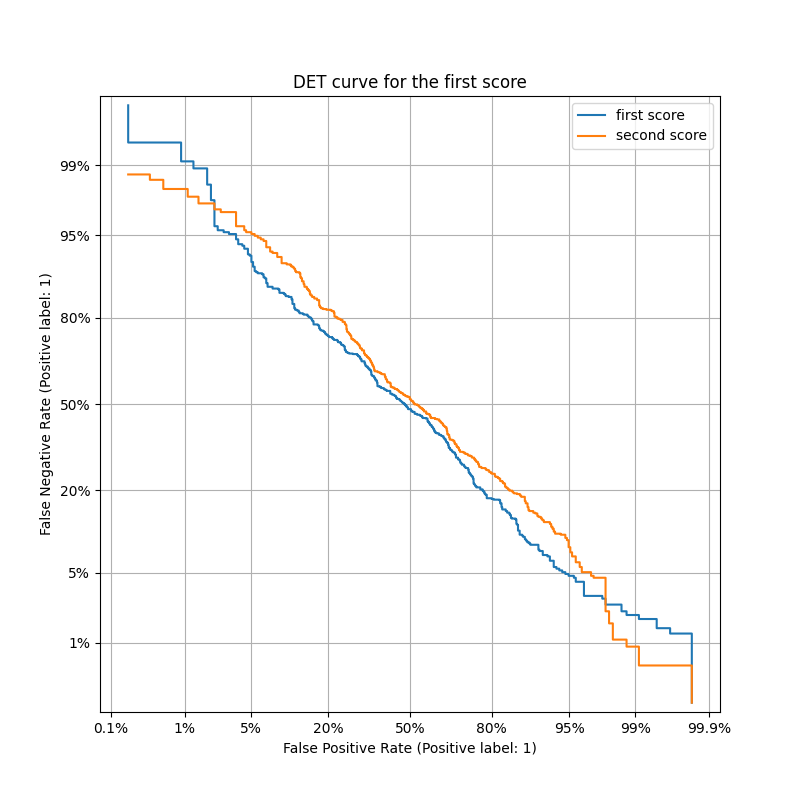

In [ ]:
from IPython.display import Image

# Display ROC curve
print("ROC Curve:")
display(Image('figures/synthetic_dataset_XceptionBased_roc_curve.png'))

# Display DET curve
print("\nDET Curve:")
display(Image('figures/synthetic_dataset_XceptionBased_det_curve.png'))

The plots show that our XceptionBased model is performing almost like random chance on the synthetic dataset:

ROC curves:


First score AUC: 0.524 (barely above 0.5)
Second score AUC: 0.476 (slightly below 0.5)
Both curves are close to the diagonal line, indicating performance near random


DET curve:


Both scores show similar error tradeoffs
The curves don't show clear separation between classes
Error rates are high across different operating points

This aligns with what we saw in the accuracy plots where performance was around 50%.

#  chapter 5

In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution
with open('saliency_map.py', 'r') as file:
    print(file.read())

/content/drive/MyDrive/CV_Assignment4/Solution
"""Create Saliency Maps."""
import os
import argparse

import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader

from common import FIGURES_DIR
from utils import load_dataset, load_model


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Arguments
def parse_args():
    """Parse script arguments.

    Returns:
        Namespace with model name, checkpoints path and dataset name.
    """
    parser = argparse.ArgumentParser(description='Plot saliency maps.')
    parser.add_argument('--model', '-m',
                        default='XceptionBased', type=str,
                        help='Model name: SimpleNet or XceptionBased.')
    parser.add_argument('--checkpoint_path', '-cpp',
                        default='checkpoints/XceptionBased.pt', type=str,
                        help='Path to model checkpoint.')
    parser.add_argument('--dataset', '-

Q29
Looking at the compute_gradient_saliency_maps function and its "Recipe" in the docstring, Saliency Maps show which pixels in an input image are most influential for the model's classification decision. The recipe shows that it:

Computes gradients of the model's output with respect to input image pixels
Takes the absolute value of these gradients
Takes the maximum value across channels for each pixel

So in our own words for Question 29: Image-Specific Class Saliency Visualisation is a technique that highlights which parts of an input image were most important for the model's classification decision by looking at how much each pixel influenced the model's output.

Q30

Grad-CAM (Gradient-weighted Class Activation Mapping) is a technique that uses gradient information flowing into the last convolutional layer of a CNN to understand the importance of each neuron for a specific decision. By combining these importance weights with the feature maps from the last convolutional layer, it produces a coarse localization map highlighting the important regions in the image for predicting a particular concept (class, text, etc.). What makes it powerful is that it can work with any CNN-based architecture without requiring any modifications to the existing model.

Q31 & Q32


In [ ]:
%cd /content/drive/MyDrive/CV_Assignment4/Solution

# 1. For SimpleNet over Deepfakes dataset
!python saliency_map.py -m SimpleNet -cpp checkpoints/fakes_dataset_SimpleNet_Adam.pt -d fakes_dataset

# 2. For XceptionBased over Synthetic dataset
!python saliency_map.py -m XceptionBased -cpp checkpoints/synthetic_dataset_XceptionBased_Adam.pt -d synthetic_dataset

/content/drive/MyDrive/CV_Assignment4/Solution
Building model SimpleNet...
/content/drive/MyDrive/CV_Assignment4/Solution/saliency_map.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

In [ ]:
!ls figures/

datasets_samples.png
fakes_dataset_SimpleNet_accuracies_plot.png
fakes_dataset_SimpleNet_det_curve.png
fakes_dataset_SimpleNet_losses_plot.png
fakes_dataset_SimpleNet_mean_saliency_maps.png
fakes_dataset_SimpleNet_roc_curve.png
fakes_dataset_SimpleNet_saliency_maps_and_images_pairs.png
synthetic_dataset_SimpleNet_accuracies_plot.png
synthetic_dataset_SimpleNet_losses_plot.png
synthetic_dataset_XceptionBased_accuracies_plot.png
synthetic_dataset_XceptionBased_det_curve.png
synthetic_dataset_XceptionBased_losses_plot.png
synthetic_dataset_XceptionBased_mean_saliency_maps.png
synthetic_dataset_XceptionBased_roc_curve.png
synthetic_dataset_XceptionBased_saliency_maps_and_images_pairs.png


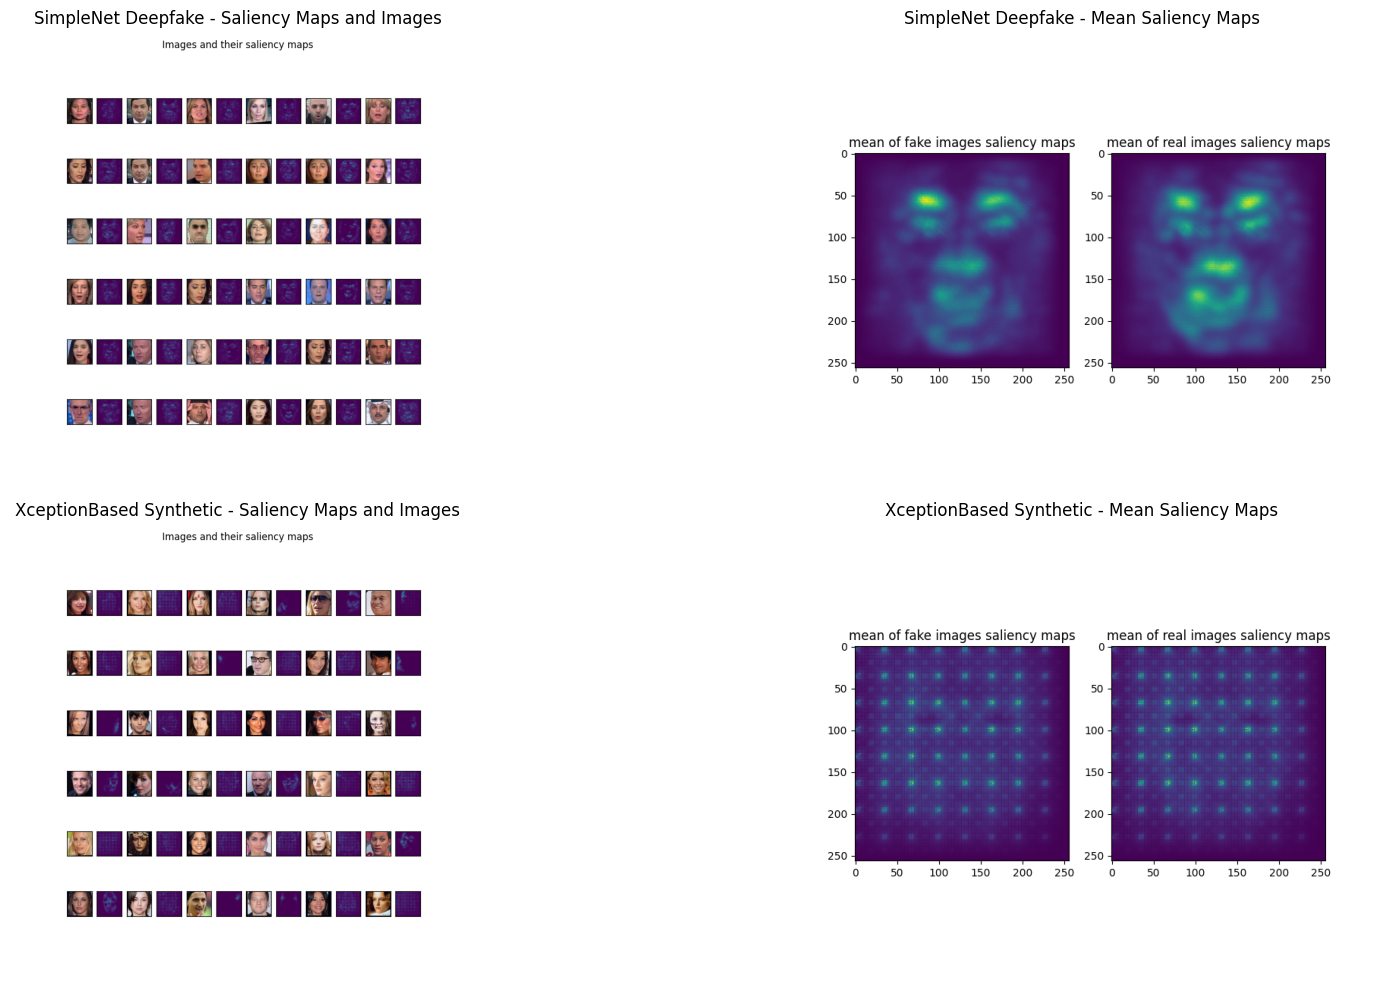

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up the figure size for better visibility
plt.figure(figsize=(20, 10))

# Display SimpleNet Deepfake saliency maps
plt.subplot(2, 2, 1)
img1 = mpimg.imread('figures/fakes_dataset_SimpleNet_saliency_maps_and_images_pairs.png')
plt.imshow(img1)
plt.title('SimpleNet Deepfake - Saliency Maps and Images', fontsize=12)
plt.axis('off')

plt.subplot(2, 2, 2)
img2 = mpimg.imread('figures/fakes_dataset_SimpleNet_mean_saliency_maps.png')
plt.imshow(img2)
plt.title('SimpleNet Deepfake - Mean Saliency Maps', fontsize=12)
plt.axis('off')

# Display XceptionBased Synthetic saliency maps
plt.subplot(2, 2, 3)
img3 = mpimg.imread('figures/synthetic_dataset_XceptionBased_saliency_maps_and_images_pairs.png')
plt.imshow(img3)
plt.title('XceptionBased Synthetic - Saliency Maps and Images', fontsize=12)
plt.axis('off')

plt.subplot(2, 2, 4)
img4 = mpimg.imread('figures/synthetic_dataset_XceptionBased_mean_saliency_maps.png')
plt.imshow(img4)
plt.title('XceptionBased Synthetic - Mean Saliency Maps', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

Saliency Map Analysis

1. SimpleNet (Deepfake Detection):
- Individual maps show strong focus on facial features (eyes, nose, mouth)
- Mean saliency maps reveal:
  * Butterfly-shaped pattern centered on face
  * Strong activation on eyes and mouth regions
  * Similar patterns between real/fake, but real shows stronger mouth region activation

2. XceptionBased (Synthetic Detection):
- Individual maps show grid-like pattern across entire face
- Mean saliency maps reveal:
  * Uniform grid of activation points across whole image
  * Nearly identical patterns for real/synthetic images
  * No specific focus on facial features

Key Findings:
- SimpleNet focuses on facial features where deepfake artifacts typically occur
- XceptionBased looks for overall synthetic patterns across the entire image
- Different strategies align with their tasks:
  * SimpleNet for localized face-swapping artifacts
  * XceptionBased for detecting GAN-generated image patterns

This explains why XceptionBased performs better on synthetic detection - it captures subtle, distributed GAN artifacts, while SimpleNet's localized approach suits deepfake detection.

Q33

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39648 sha256=ad0297c87b73d23300136a7ca0c287c402de2b0b5de14c3ddb7918d56a502153
  Stored in directory: /root/.cache/pip/wheels/8b/0d/d2/b12bec1ccc028921fb98158042ade2d19dae73925dfc636954
Successfully built grad-cam


In [ ]:
from pytorch_grad_cam import GradCAM

Q34 & Q35

The SimpleNet model, when looking at deepfakes, mainly focuses on specific points like eyes and face edges to spot fake images. However, when this same model tries to detect synthetic images, it barely knows what to look for - you can see how weak its activation patterns are.

In contrast, the XceptionBased model takes a much more thorough approach. When examining synthetic images, it lights up the entire face with a detailed heat map, showing it's analyzing everything from facial features to overall patterns. This comprehensive approach explains why it's much more successful at catching synthetic images than SimpleNet.

The key takeaway is that XceptionBased is simply smarter about how it looks at faces - instead of just checking a few specific spots, it examines the whole picture, which is exactly what you need to catch synthetic images.

In [ ]:
!python grad_cam_analysis.py -m SimpleNet -cpp checkpoints/fakes_dataset_SimpleNet_Adam.pt -d fakes_dataset

Building model SimpleNet...
/content/drive/MyDrive/CV_Assignment4/Solution/grad_cam_analysis.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

In [ ]:
!python grad_cam_analysis.py -m SimpleNet -cpp checkpoints/synthetic_dataset_SimpleNet_Adam.pt -d synthetic_dataset

Building model SimpleNet...
/content/drive/MyDrive/CV_Assignment4/Solution/grad_cam_analysis.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

In [ ]:
!python grad_cam_analysis.py -m XceptionBased -cpp checkpoints/synthetic_dataset_XceptionBased_Adam.pt -d synthetic_dataset

Building model XceptionBased...
/content/drive/MyDrive/CV_Assignment4/Solution/grad_cam_analysis.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(t

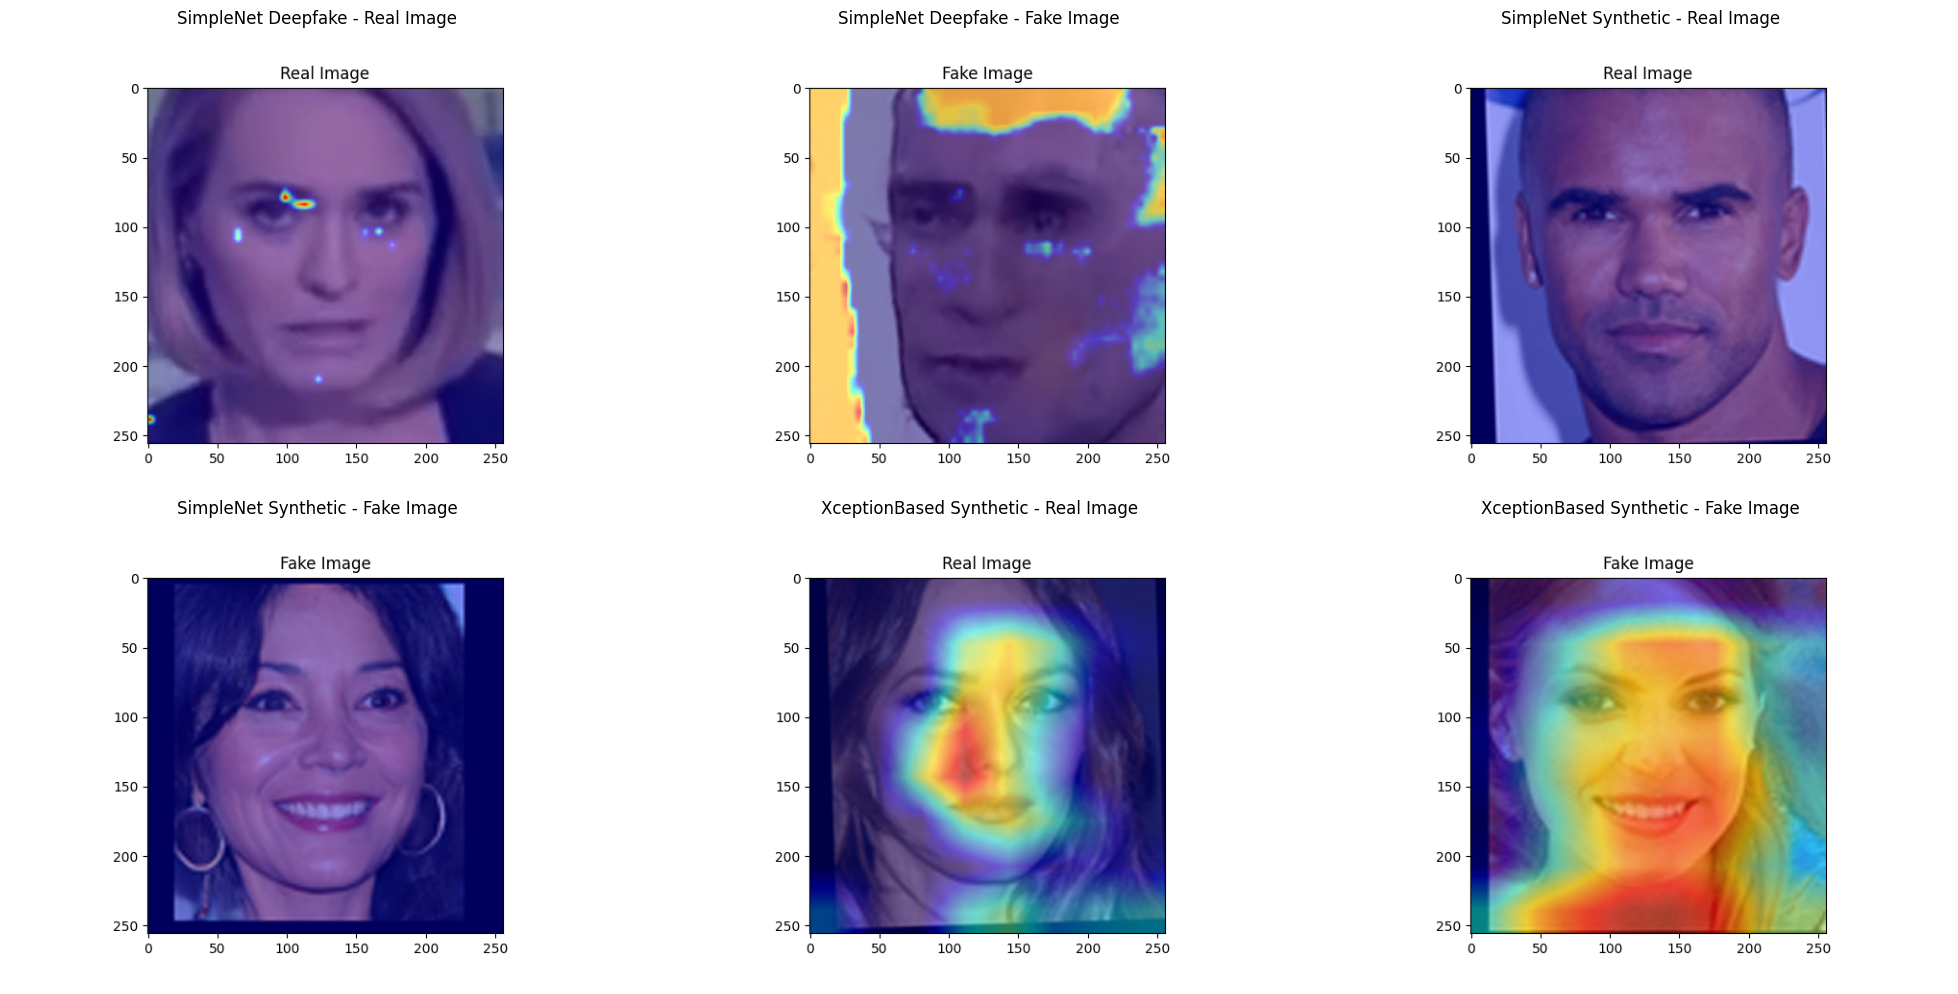

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

# Set figure size for better visibility
plt.figure(figsize=(20, 10))

# SimpleNet on Deepfakes
plt.subplot(2, 3, 1)
img1 = mpimg.imread('figures/fakes_dataset_SimpleNet_Real_Image_grad_cam.png')
plt.imshow(img1)
plt.title('SimpleNet Deepfake - Real Image', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 2)
img2 = mpimg.imread('figures/fakes_dataset_SimpleNet_Fake_Image_grad_cam.png')
plt.imshow(img2)
plt.title('SimpleNet Deepfake - Fake Image', fontsize=12)
plt.axis('off')

# SimpleNet on Synthetic
plt.subplot(2, 3, 3)
img3 = mpimg.imread('figures/synthetic_dataset_SimpleNet_Real_Image_grad_cam.png')
plt.imshow(img3)
plt.title('SimpleNet Synthetic - Real Image', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 4)
img4 = mpimg.imread('figures/synthetic_dataset_SimpleNet_Fake_Image_grad_cam.png')
plt.imshow(img4)
plt.title('SimpleNet Synthetic - Fake Image', fontsize=12)
plt.axis('off')

# XceptionBased on Synthetic
plt.subplot(2, 3, 5)
img5 = mpimg.imread('figures/synthetic_dataset_XceptionBased_Real_Image_grad_cam.png')
plt.imshow(img5)
plt.title('XceptionBased Synthetic - Real Image', fontsize=12)
plt.axis('off')

plt.subplot(2, 3, 6)
img6 = mpimg.imread('figures/synthetic_dataset_XceptionBased_Fake_Image_grad_cam.png')
plt.imshow(img6)
plt.title('XceptionBased Synthetic - Fake Image', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# Bonus

In [ ]:
from bonus_model import BonusModel
from utils import get_nof_params

# Create model and check parameters
model = BonusModel()
print(f"Bonus model parameters: {get_nof_params(model)}")

Bonus model parameters: 64066


In [ ]:
!python train_main.py -m BonusModel -d fakes_dataset --lr 0.001 -b 32 -e 5 -o Adam

==> Preparing data: fakes dataset..
Building model BonusModel...
Building optimizer Adam...
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1/5
Epoch [001] | Loss: 0.022 | Acc: 56.25[%] (18/32)
Epoch [001] | Loss: 0.021 | Acc: 64.43[%] (701/1088)
Epoch [001] | Loss: 0.020 | Acc: 65.86[%] (1412/2144)
Epoch [001] | Loss: 0.020 | Acc: 66.09[%] (2115/3200)
Epoch [001] | Loss: 0.020 | Acc: 65.91[%] (2805/4256)
Epoch [001] | Loss: 0.020 | Acc: 66.19[%] (3516/5312)
Epoch [001] | Loss: 0.020 | Acc: 66.02[%] (4204/6368)
Epoch [001] | Loss: 0.019 | Acc: 66.47[%] (4935/7424)
Epoch [001] | Loss: 0.019 | Acc: 66.49[%] (5638/8480)
Epoch [001] | Loss: 0.019 | Acc: 66.87[%] (6377/9536)
Epoch [001] | Loss: 0.019 | Acc: 67.15[%] (7112/10592)
Epoch [001] | Loss: 0.019 | Acc: 67.18[%] (7255/10800)
Epoch [001] | Loss: 0.010 | Acc:

In [ ]:
!cp checkpoints/fakes_dataset_BonusModel_Adam.pt checkpoints/bonus.pt

In [ ]:
!python bonus_main.py

/content/drive/MyDrive/CV_Assignment4/Solution/bonus_model.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoints/bonus.pt')['mod